In [64]:
import requests, json
import pandas as pd
BASE_URL = "https://api.weather.gov/gridpoints/GSP/40,68/"
USER_AGENT = "weather-learner/1.0"
CACHED_DATA_FILE = "forecast.json" 

def fetch_forecast() -> dict[str, dict]:
    return requests.get(
        BASE_URL + "forecast",
        headers={"User-Agent": USER_AGENT}
    ).json()

def load_cached_data() -> dict[str,dict]:
    try:
        with open(CACHED_DATA_FILE, "r") as f:
            import json
            return json.load(f)
    except FileNotFoundError:
        return {}

def cache_forecast(forecast_data) -> None:
    with open(CACHED_DATA_FILE, "w") as f:
        json.dump(forecast_data, f, indent=4)
    print("Forecast data saved to forecast.json")


In [94]:
cache_forecast(fetch_forecast())

Forecast data saved to forecast.json


In [96]:
forecast_data_raw: dict[str, dict] = load_cached_data()
forecast_data_df = pd.DataFrame(forecast_data_raw['properties']['periods']) # type: ignore
forecast_data_df = forecast_data_df.set_index("name")

In [97]:
forecast_data_df_mod = forecast_data_df.drop(columns=['number', 'startTime', 'endTime', 'isDaytime', 'temperatureUnit', 'icon', 'temperatureTrend'])
forecast_data_df_mod["probabilityOfPrecipitation"] = forecast_data_df["probabilityOfPrecipitation"].map(lambda x: x.get("value") if isinstance(x, dict) else None)

In [98]:
forecast_data_df_mod

,temperature,probabilityOfPrecipitation,windSpeed,windDirection,shortForecast,detailedForecast
name,,,,,,
Juneteenth,77,52,6 to 10 mph,WSW,Chance Showers And Thunderstorms,A chance of showers and thunderstorms. Mostly ...
Tonight,58,41,1 to 8 mph,WNW,Chance Showers And Thunderstorms then Partly C...,A chance of showers and thunderstorms before m...
Friday,81,3,5 mph,N,Sunny,"Sunny, with a high near 81. North wind around ..."
Friday Night,61,4,1 to 5 mph,NNE,Partly Cloudy,"Partly cloudy, with a low around 61. North nor..."
Saturday,85,6,3 mph,SSW,Sunny,"Sunny, with a high near 85. South southwest wi..."
Saturday Night,63,5,3 mph,SSW,Mostly Clear,"Mostly clear, with a low around 63."
Sunday,87,15,3 mph,NNE,Sunny then Slight Chance Showers And Thunderst...,A slight chance of showers and thunderstorms a...
Sunday Night,64,13,3 mph,SSW,Mostly Clear,"Mostly clear, with a low around 64."
Monday,88,16,1 to 5 mph,NE,Sunny then Slight Chance Showers And Thunderst...,A slight chance of showers and thunderstorms a...


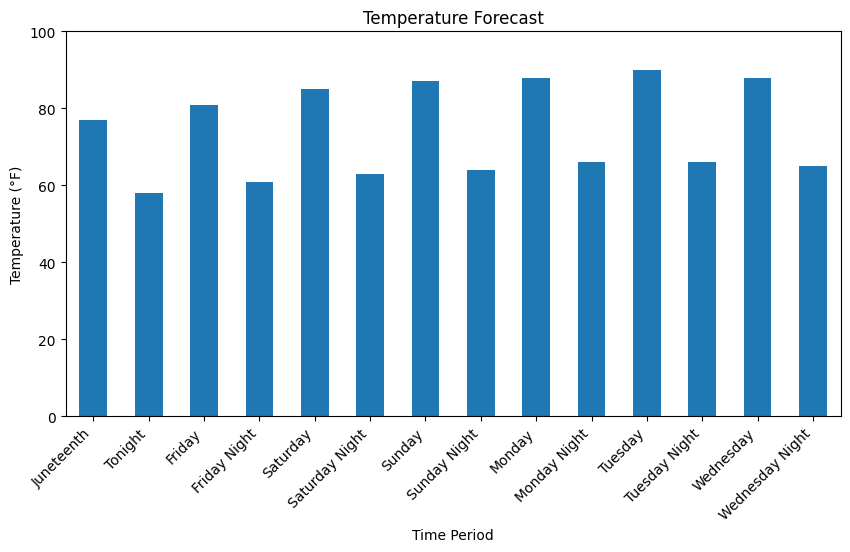

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
forecast_data_df_mod['temperature'].plot(kind='bar')
plt.title('Temperature Forecast')
plt.xlabel('Time Period')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 100])
#plt.tight_layout()
plt.show()